In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

In [143]:
import matplotlib
import math

In [21]:
import pandas as pd

Reading the Edge endpoint information generated from matlab

In [339]:
ei = pd.read_csv("ei.csv",header=None)

In [340]:
ej = pd.read_csv("ej.csv", header=None)

In [342]:
ei

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.575,0,0,0,-0.575,0.531818,0.6375,0.5750,0.637500,-0.250000,...,0.531818,-0.531818,-0.25,0.25,-0.531818,-0.637500,-0.637500,-0.25,0.25,0.531818
1,0.000,0,0,0,0.000,0.637500,0.5750,0.6375,0.531818,-0.531818,...,3.063636,-3.063636,-0.25,0.25,-3.063636,-4.150694,-4.150694,-0.25,0.25,3.063636


In [343]:
ei = ei.to_numpy()

In [344]:
ei.shape

(2, 33)

In [345]:
ej = ej.to_numpy()

In [56]:
ej.shape

(2, 33)

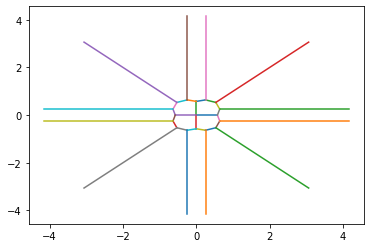

In [346]:
for i in range(ei.shape[1]):
    plt.plot([ei[0][i], ei[1][i]], [ej[0][i], ej[1][i]])

In [59]:
ei

array([[ 0.575     ,  0.        ,  0.        ,  0.        , -0.575     ,
         0.53181818,  0.6375    ,  0.575     ,  0.6375    , -0.25      ,
         0.25      ,  0.        ,  0.53181818, -0.6375    , -0.6375    ,
        -0.575     , -0.53181818, -0.53181818,  0.        , -0.25      ,
         0.25      ,  0.6375    ,  0.6375    ,  0.53181818, -0.53181818,
        -0.25      ,  0.25      , -0.53181818, -0.6375    , -0.6375    ,
        -0.25      ,  0.25      ,  0.53181818],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.6375    ,  0.575     ,  0.6375    ,  0.53181818, -0.53181818,
         0.        , -0.25      ,  0.25      , -0.53181818, -0.575     ,
        -0.6375    , -0.6375    , -0.25      ,  0.25      ,  0.        ,
         0.53181818,  4.15069442,  4.15069442,  3.06363636, -3.06363636,
        -0.25      ,  0.25      , -3.06363636, -4.15069442, -4.15069442,
        -0.25      ,  0.25      ,  3.06363636]])

In [61]:
ej

array([[ 0.        ,  0.        ,  0.575     ,  0.        ,  0.        ,
        -0.53181818, -0.25      ,  0.        ,  0.25      ,  0.6375    ,
         0.6375    ,  0.575     ,  0.53181818, -0.25      ,  0.25      ,
         0.        ,  0.53181818, -0.53181818, -0.575     , -0.6375    ,
        -0.6375    , -0.25      ,  0.25      ,  0.53181818,  0.53181818,
         0.6375    ,  0.6375    , -0.53181818, -0.25      ,  0.25      ,
        -0.6375    , -0.6375    , -0.53181818],
       [ 0.        ,  0.        ,  0.        , -0.575     ,  0.        ,
        -0.25      ,  0.        ,  0.25      ,  0.53181818,  0.53181818,
         0.575     ,  0.6375    ,  0.6375    , -0.53181818,  0.        ,
        -0.25      ,  0.25      , -0.6375    , -0.6375    , -0.575     ,
        -0.53181818, -0.25      ,  0.25      ,  3.06363636,  3.06363636,
         4.15069442,  4.15069442, -3.06363636, -0.25      ,  0.25      ,
        -4.15069442, -4.15069442, -3.06363636]])

Truncating the edge segments of voronoi diagram which are inside central obstacle or outside the arena

In [73]:
from sympy import Point, Line, Segment

In [74]:
arena_border_points = [Point(-1, -1), Point(1, -1), Point(1, 1), Point(-1, 1)]

In [122]:
voronoi_segments = []

In [123]:
for i in range(ei.shape[1]):
    end_point1 = Point(ei[0][i], ej[0][i])
    end_point2 = Point(ei[1][i], ej[1][i])
    S = Segment(end_point1, end_point2)
    print(S)
    voronoi_segments.append(S)

Segment2D(Point2D(23/40, 0), Point2D(0, 0))
Point2D(0, 0)
Segment2D(Point2D(0, 23/40), Point2D(0, 0))
Segment2D(Point2D(0, 0), Point2D(0, -23/40))
Segment2D(Point2D(-23/40, 0), Point2D(0, 0))
Segment2D(Point2D(265909090909091/500000000000000, -265909090909091/500000000000000), Point2D(51/80, -1/4))
Segment2D(Point2D(51/80, -1/4), Point2D(23/40, 0))
Segment2D(Point2D(23/40, 0), Point2D(51/80, 1/4))
Segment2D(Point2D(51/80, 1/4), Point2D(265909090909091/500000000000000, 265909090909091/500000000000000))
Segment2D(Point2D(-1/4, 51/80), Point2D(-265909090909091/500000000000000, 265909090909091/500000000000000))
Segment2D(Point2D(1/4, 51/80), Point2D(0, 23/40))
Segment2D(Point2D(0, 23/40), Point2D(-1/4, 51/80))
Segment2D(Point2D(265909090909091/500000000000000, 265909090909091/500000000000000), Point2D(1/4, 51/80))
Segment2D(Point2D(-51/80, -1/4), Point2D(-265909090909091/500000000000000, -265909090909091/500000000000000))
Segment2D(Point2D(-51/80, 1/4), Point2D(-23/40, 0))
Segment2D(Point2

In [124]:
count = 0
for i in voronoi_segments:
    if isinstance(i, Point):
        count = count+1
print(count)

1


[1, 3]


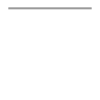

In [110]:
voronoi_segments[0]

In [126]:
voronoi_segments.pop(1)

Point2D(0, 0)

In [127]:
arena_line_segments = []

In [128]:
for i in range(4):
    end_point1 = arena_border_points[i]
    end_point2 = arena_border_points[(i+1)%4]
    S = Segment(end_point1, end_point2)
    arena_line_segments.append(S)

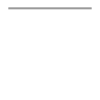

In [129]:
arena_line_segments[0]

In [130]:
arena_line_segments[0].points

(Point2D(-1, -1), Point2D(1, -1))

In [131]:
arena_line_segments[0].points[0]

Point2D(-1, -1)

In [132]:
central_arena_point = Point(0,0)

In [133]:
def same_side(segment, point1, point2):
    segment_ept1 = segment.points[0]
    segment_ept2 = segment.points[1]
    
    if  segment_ept2[0] - segment_ept1[0] == 0:
        cond1 = point1[0] - segment_ept1[0]
        cond2 = point2[0] - segment_ept2[0]
    
    else:
        m = (segment_ept2[1] - segment_ept1[1]) / (segment_ept2[0] - segment_ept1[0])
        c = segment_ept1[1] - m*segment_ept1[0]
    
        cond1 = m*point1[0] - point1[1] + c
        cond2 = m*point2[0] - point2[1] + c
    
    if cond1 * cond2 < 0:
        return False
    else:
        return True

In [134]:
same_side(arena_line_segments[0],central_arena_point ,arena_border_points[2])

True

In [135]:
len(voronoi_segments)

32

In [149]:
voronoi_updated_segments = []

In [150]:
voronoi_segments

[Segment2D(Point2D(23/40, 0), Point2D(0, 0)),
 Segment2D(Point2D(0, 23/40), Point2D(0, 0)),
 Segment2D(Point2D(0, 0), Point2D(0, -23/40)),
 Segment2D(Point2D(-23/40, 0), Point2D(0, 0)),
 Segment2D(Point2D(265909090909091/500000000000000, -265909090909091/500000000000000), Point2D(51/80, -1/4)),
 Segment2D(Point2D(51/80, -1/4), Point2D(23/40, 0)),
 Segment2D(Point2D(23/40, 0), Point2D(51/80, 1/4)),
 Segment2D(Point2D(51/80, 1/4), Point2D(265909090909091/500000000000000, 265909090909091/500000000000000)),
 Segment2D(Point2D(-1/4, 51/80), Point2D(-265909090909091/500000000000000, 265909090909091/500000000000000)),
 Segment2D(Point2D(1/4, 51/80), Point2D(0, 23/40)),
 Segment2D(Point2D(0, 23/40), Point2D(-1/4, 51/80)),
 Segment2D(Point2D(265909090909091/500000000000000, 265909090909091/500000000000000), Point2D(1/4, 51/80)),
 Segment2D(Point2D(-51/80, -1/4), Point2D(-265909090909091/500000000000000, -265909090909091/500000000000000)),
 Segment2D(Point2D(-51/80, 1/4), Point2D(-23/40, 0)),
 S

Remove line segments passing through origin

In [151]:
for i,seg in enumerate(voronoi_segments):
    flag = False
    for arena_seg in arena_line_segments:
        pt_inter = seg.intersection(arena_seg)
        if len(pt_inter) > 0:
            intersection_point = pt_inter[0]
            pt1 = seg.points[0]
            pt2 = seg.points[1]
            if same_side(arena_seg, central_arena_point, pt1):
                voronoi_updated_segments.append(Segment(intersection_point, pt1))
            else:
                voronoi_updated_segments.append(Segment(intersection_point, pt1))
            flag = True
            break
            
    if not flag:
        voronoi_updated_segments.append(seg)
    
    seg = voronoi_updated_segments[-1]
    if len(seg.intersection(Point(central_arena_point))) > 0:
        voronoi_updated_segments.pop()

In [152]:
voronoi_updated_segments

[Segment2D(Point2D(265909090909091/500000000000000, -265909090909091/500000000000000), Point2D(51/80, -1/4)),
 Segment2D(Point2D(51/80, -1/4), Point2D(23/40, 0)),
 Segment2D(Point2D(23/40, 0), Point2D(51/80, 1/4)),
 Segment2D(Point2D(51/80, 1/4), Point2D(265909090909091/500000000000000, 265909090909091/500000000000000)),
 Segment2D(Point2D(-1/4, 51/80), Point2D(-265909090909091/500000000000000, 265909090909091/500000000000000)),
 Segment2D(Point2D(1/4, 51/80), Point2D(0, 23/40)),
 Segment2D(Point2D(0, 23/40), Point2D(-1/4, 51/80)),
 Segment2D(Point2D(265909090909091/500000000000000, 265909090909091/500000000000000), Point2D(1/4, 51/80)),
 Segment2D(Point2D(-51/80, -1/4), Point2D(-265909090909091/500000000000000, -265909090909091/500000000000000)),
 Segment2D(Point2D(-51/80, 1/4), Point2D(-23/40, 0)),
 Segment2D(Point2D(-23/40, 0), Point2D(-51/80, -1/4)),
 Segment2D(Point2D(-265909090909091/500000000000000, 265909090909091/500000000000000), Point2D(-51/80, 1/4)),
 Segment2D(Point2D(-265

Plotting the final voronoi diagram

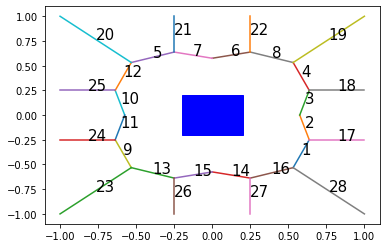

In [157]:
for i,seg in enumerate(voronoi_updated_segments):
    pt1 = seg.points[0]
    pt2 = seg.points[1]
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
    plt.text((pt1[0]+pt2[0])/2, (pt1[1]+pt2[1])/2, "{0}".format(i+1), fontsize = 15)
rect1 = matplotlib.patches.Rectangle((-0.2, -0.2),0.4, 0.4,color ='blue')
plt.gca().add_patch(rect1)

In [159]:
for i,seg in enumerate(voronoi_updated_segments):
    print("[{0}] -> ({1})   ({2})".format(i+1, (round(seg.points[0][0],2), round(seg.points[0][1],2)), (round(seg.points[1][0],2), round(seg.points[1][1],2))))

[1] -> ((0.53, -0.53))   ((0.64, -0.25))
[2] -> ((0.64, -0.25))   ((0.58, 0))
[3] -> ((0.58, 0))   ((0.64, 0.25))
[4] -> ((0.64, 0.25))   ((0.53, 0.53))
[5] -> ((-0.25, 0.64))   ((-0.53, 0.53))
[6] -> ((0.25, 0.64))   ((0, 0.58))
[7] -> ((0, 0.58))   ((-0.25, 0.64))
[8] -> ((0.53, 0.53))   ((0.25, 0.64))
[9] -> ((-0.64, -0.25))   ((-0.53, -0.53))
[10] -> ((-0.64, 0.25))   ((-0.58, 0))
[11] -> ((-0.58, 0))   ((-0.64, -0.25))
[12] -> ((-0.53, 0.53))   ((-0.64, 0.25))
[13] -> ((-0.53, -0.53))   ((-0.25, -0.64))
[14] -> ((0, -0.58))   ((0.25, -0.64))
[15] -> ((-0.25, -0.64))   ((0, -0.58))
[16] -> ((0.25, -0.64))   ((0.53, -0.53))
[17] -> ((1, -0.25))   ((0.64, -0.25))
[18] -> ((1, 0.25))   ((0.64, 0.25))
[19] -> ((1, 1))   ((0.53, 0.53))
[20] -> ((-1, 1))   ((-0.53, 0.53))
[21] -> ((-0.25, 1))   ((-0.25, 0.64))
[22] -> ((0.25, 1))   ((0.25, 0.64))
[23] -> ((-1, -1))   ((-0.53, -0.53))
[24] -> ((-1, -0.25))   ((-0.64, -0.25))
[25] -> ((-1, 0.25))   ((-0.64, 0.25))
[26] -> ((-0.25, -1))   (

In [191]:
Nodes_to_coord = {}
coord_to_Node = {}
num_nodes = 0

In [192]:
for i,seg in enumerate(voronoi_updated_segments):
    if seg.points[0] not in coord_to_Node:
        Nodes_to_coord[num_nodes+1] = (round(seg.points[0][0],2), round(seg.points[0][1],2))
        coord_to_Node[seg.points[0]] = num_nodes+1
    if seg.points[1] not in inv_Nodes_dict:
        Nodes_to_coord[num_nodes+1] = (round(seg.points[1][0],2), round(seg.points[1][1],2))
        coord_to_Node[seg.points[1]] = num_nodes+1
    num_nodes = num_nodes+1

In [193]:
Nodes_to_coord

{1: (0.53, -0.53),
 2: (0.64, -0.25),
 3: (0.58, 0),
 4: (0.64, 0.25),
 5: (-0.25, 0.64),
 6: (0.25, 0.64),
 7: (0, 0.58),
 8: (0.53, 0.53),
 9: (-0.64, -0.25),
 10: (-0.64, 0.25),
 11: (-0.58, 0),
 12: (-0.53, 0.53),
 13: (-0.53, -0.53),
 14: (0, -0.58),
 15: (-0.25, -0.64),
 16: (0.25, -0.64),
 17: (1, -0.25),
 18: (1, 0.25),
 19: (1, 1),
 20: (-1, 1),
 21: (-0.25, 1),
 22: (0.25, 1),
 23: (-1, -1),
 24: (-1, -0.25),
 25: (-1, 0.25),
 26: (-0.25, -1),
 27: (0.25, -1),
 28: (1, -1)}

In [194]:
Nodes_dict = Nodes_to_coord

In [198]:
Edges_dict = {}
num_edges = 0

In [199]:
for i,seg in enumerate(voronoi_updated_segments):
    Edges_dict[num_edges+1] = (coord_to_Node[seg.points[0]], coord_to_Node[seg.points[1]])
    num_edges = num_edges+1
    #Edges_dict[num_edges+1] = (coord_to_Node[seg.points[1]], coord_to_Node[seg.points[0]])
    #num_edges = num_edges+1

In [200]:
Edges_dict

{1: (1, 2),
 2: (2, 3),
 3: (3, 4),
 4: (4, 8),
 5: (5, 12),
 6: (6, 7),
 7: (7, 5),
 8: (8, 6),
 9: (9, 13),
 10: (10, 11),
 11: (11, 9),
 12: (12, 10),
 13: (13, 15),
 14: (14, 16),
 15: (15, 14),
 16: (16, 1),
 17: (17, 2),
 18: (18, 4),
 19: (19, 8),
 20: (20, 12),
 21: (21, 5),
 22: (22, 6),
 23: (23, 13),
 24: (24, 9),
 25: (25, 10),
 26: (26, 15),
 27: (27, 16),
 28: (28, 1)}

In [209]:
a

In [202]:
import networkx as nx

In [211]:
G = nx.Graph()

In [212]:
for key in Edges_dict.keys():
    G.add_edge(Edges_dict[key][0], Edges_dict[key][1], weight = compute_eucledian_distance(Nodes_dict[Edges_dict[key][0]], Nodes_dict[Edges_dict[key][1]]))

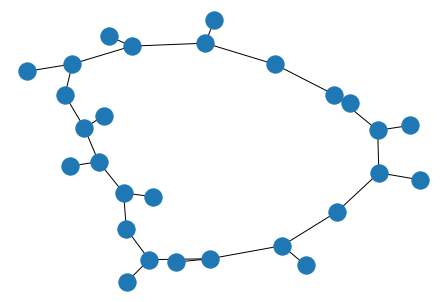

In [213]:
nx.draw(G)

In [214]:
G.edges

EdgeView([(1, 2), (1, 16), (1, 28), (2, 3), (2, 17), (3, 4), (4, 8), (4, 18), (8, 6), (8, 19), (5, 12), (5, 7), (5, 21), (12, 10), (12, 20), (6, 7), (6, 22), (9, 13), (9, 11), (9, 24), (13, 15), (13, 23), (10, 11), (10, 25), (15, 14), (15, 26), (14, 16), (16, 27)])

In [215]:
G.nodes

NodeView((1, 2, 3, 4, 8, 5, 12, 6, 7, 9, 13, 10, 11, 15, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28))

In [219]:
nx.dijkstra_path(G, 1, 12)

[1, 2, 3, 4, 8, 6, 7, 5, 12]

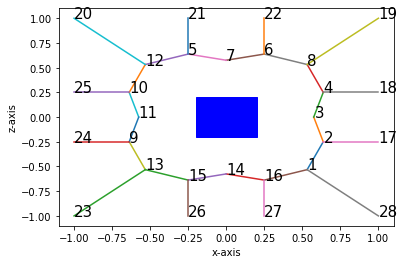

In [330]:
for i,seg in enumerate(voronoi_updated_segments):
    pt1 = seg.points[0]
    pt2 = seg.points[1]
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
    #plt.text((pt1[0]+pt2[0])/2, (pt1[1]+pt2[1])/2, "{0}".format(i+1), fontsize = 15)
for node in Nodes_dict.keys():
    plt.text(Nodes_dict[node][0], Nodes_dict[node][1], "{0}".format(node), fontsize = 15)
#plt.text((pt1[0]+pt2[0])/2, (pt1[1]+pt2[1])/2, "{0}".format(i+1), fontsize = 15)
plt.xlabel("x-axis")
plt.ylabel("z-axis")
rect1 = matplotlib.patches.Rectangle((-0.2, -0.2),0.4, 0.4,color ='blue')
plt.gca().add_patch(rect1)

In [223]:
nx.dijkstra_path(G, 12, 13)

[12, 10, 11, 9, 13]

In [224]:
import pickle

In [308]:
pickle.dump(Nodes_dict, open( "Nodes_dict", "wb" ) , protocol=2)

In [309]:
pickle.dump(Edges_dict, open( "Edges_dict", "wb" ), protocol=2)

In [227]:
Nodes_dict

{1: (0.53, -0.53),
 2: (0.64, -0.25),
 3: (0.58, 0),
 4: (0.64, 0.25),
 5: (-0.25, 0.64),
 6: (0.25, 0.64),
 7: (0, 0.58),
 8: (0.53, 0.53),
 9: (-0.64, -0.25),
 10: (-0.64, 0.25),
 11: (-0.58, 0),
 12: (-0.53, 0.53),
 13: (-0.53, -0.53),
 14: (0, -0.58),
 15: (-0.25, -0.64),
 16: (0.25, -0.64),
 17: (1, -0.25),
 18: (1, 0.25),
 19: (1, 1),
 20: (-1, 1),
 21: (-0.25, 1),
 22: (0.25, 1),
 23: (-1, -1),
 24: (-1, -0.25),
 25: (-1, 0.25),
 26: (-0.25, -1),
 27: (0.25, -1),
 28: (1, -1)}

In [310]:
Edges_dict

{1: (1, 2),
 2: (2, 3),
 3: (3, 4),
 4: (4, 8),
 5: (5, 12),
 6: (6, 7),
 7: (7, 5),
 8: (8, 6),
 9: (9, 13),
 10: (10, 11),
 11: (11, 9),
 12: (12, 10),
 13: (13, 15),
 14: (14, 16),
 15: (15, 14),
 16: (16, 1),
 17: (17, 2),
 18: (18, 4),
 19: (19, 8),
 20: (20, 12),
 21: (21, 5),
 22: (22, 6),
 23: (23, 13),
 24: (24, 9),
 25: (25, 10),
 26: (26, 15),
 27: (27, 16),
 28: (28, 1)}

Example run of Djikstra algorithm

In [228]:
path = nx.dijkstra_path(G, 12, 13)

In [229]:
[Nodes_dict[pt] for pt in path]

[(-0.53, 0.53), (-0.64, 0.25), (-0.58, 0), (-0.64, -0.25), (-0.53, -0.53)]

In [234]:
from numpy import arccos, array
from numpy.linalg import norm

In [235]:
def theta(v, w): 
    return arccos(v.dot(w)/(norm(v)*norm(w)))

Scatter Plot of markers

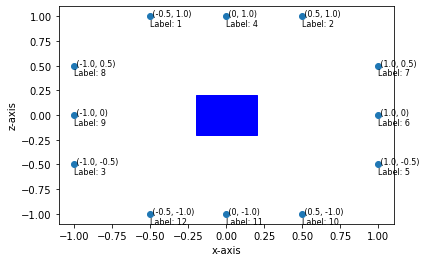

In [329]:
plt.scatter([x[0] for x in landmarks], [x[1] for x in landmarks])
labels = [5, 6, 7, 1, 4, 2, 3, 9, 8, 12, 11, 10]
for id, marker in enumerate(landmarks):
    plt.text(marker[0], marker[1], " {0}".format((marker[0], marker[1])), fontsize = 8)
    plt.text(marker[0], marker[1]-0.1, "Label: {0}".format(labels[id]), fontsize = 8)
plt.xlabel("x-axis")
plt.ylabel("z-axis")
rect1 = matplotlib.patches.Rectangle((-0.2, -0.2),0.4, 0.4,color ='blue')
plt.gca().add_patch(rect1)

Final Nodes_dict

In [331]:
Nodes_dict

{1: (0.53, -0.53),
 2: (0.64, -0.25),
 3: (0.58, 0),
 4: (0.64, 0.25),
 5: (-0.25, 0.64),
 6: (0.25, 0.64),
 7: (0, 0.58),
 8: (0.53, 0.53),
 9: (-0.64, -0.25),
 10: (-0.64, 0.25),
 11: (-0.58, 0),
 12: (-0.53, 0.53),
 13: (-0.53, -0.53),
 14: (0, -0.58),
 15: (-0.25, -0.64),
 16: (0.25, -0.64),
 17: (1, -0.25),
 18: (1, 0.25),
 19: (1, 1),
 20: (-1, 1),
 21: (-0.25, 1),
 22: (0.25, 1),
 23: (-1, -1),
 24: (-1, -0.25),
 25: (-1, 0.25),
 26: (-0.25, -1),
 27: (0.25, -1),
 28: (1, -1)}

Final Edges_dict

In [332]:
Edges_dict

{1: (1, 2),
 2: (2, 3),
 3: (3, 4),
 4: (4, 8),
 5: (5, 12),
 6: (6, 7),
 7: (7, 5),
 8: (8, 6),
 9: (9, 13),
 10: (10, 11),
 11: (11, 9),
 12: (12, 10),
 13: (13, 15),
 14: (14, 16),
 15: (15, 14),
 16: (16, 1),
 17: (17, 2),
 18: (18, 4),
 19: (19, 8),
 20: (20, 12),
 21: (21, 5),
 22: (22, 6),
 23: (23, 13),
 24: (24, 9),
 25: (25, 10),
 26: (26, 15),
 27: (27, 16),
 28: (28, 1)}